In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_25205_R')

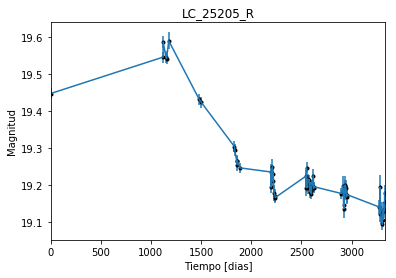

In [2]:
data = np.genfromtxt('LC_25205_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_25205_R')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

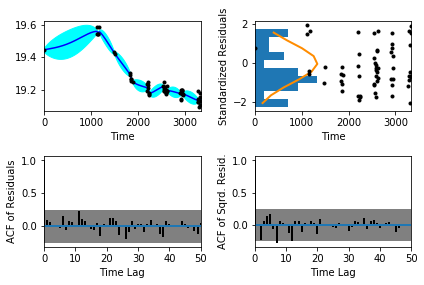

In [5]:
sample.assess_fit()

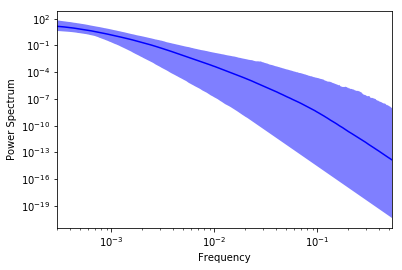

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000374595,0.0243967,'Medida del nivel de ruido')

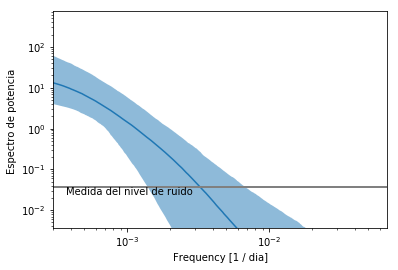

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

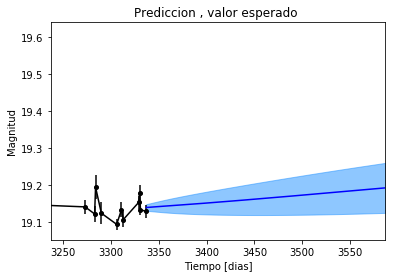

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


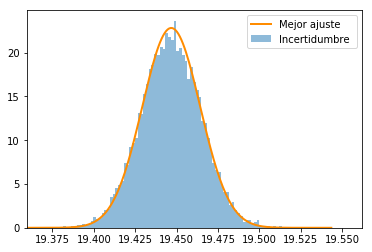

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

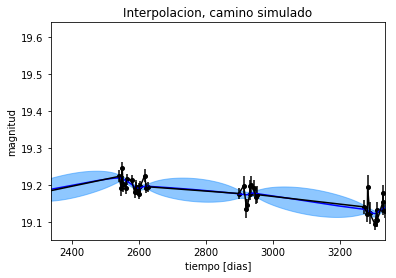

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

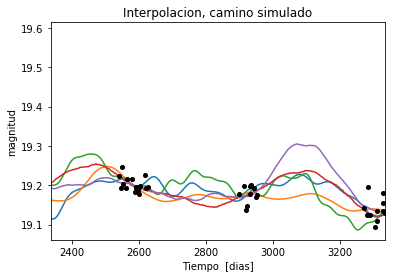

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 530.176296406
Median: 0.010941226301
Standard deviation: 0.214160478397
68% credibility interval: [ 0.00054346  0.22872021]
95% credibility interval: [  3.17179707e-04   8.46701057e-01]
99% credibility interval: [  3.03033714e-04   1.03248322e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 598.950111555
Median: 0.00083425340166
Standard deviation: 0.0868552433459
68% credibility interval: [ 0.00035626  0.01494795]
95% credibility interval: [ 0.00030745  0.1776416 ]
99% credibility interval: [  3.00418066e-04   8.03717066e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 309.451818394
Median: 0.0069655168284
Standard d

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1131.37643363
Median: 156.110061863
Standard deviation: 1.71024568899
68% credibility interval: [ 154.21937575  157.31369837]
95% credibility interval: [ 151.68343962  158.48582714]
99% credibility interval: [ 149.33587593  159.2374328 ]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 561.281465603
Median: 0.435888052728
Standard deviation: 2.07010857896
68% credibility interval: [ 0.02760664  3.42495066]
95% credibility interval: [ 0.00991192  6.74597895]
99% credibility interval: [  8.09573264e-03   1.02270753e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 457.897676811
Median: 0.156298530076
Standard deviation: 7.51883057396
68% credibility interval: [ 0.00601612  2.83349194]
95% credibility interval: [  3.6

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 4760.06902676
Median: 4.03191701569e-54
Standard deviation: 7.05184830217e+78
68% credibility interval: [  3.44043558e-98   1.20025586e-08]
95% credibility interval: [  2.51651944e-146   6.34049841e+001]
99% credibility interval: [  1.22526535e-191   9.54496621e+031]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1458.94055181
Median: 19.3255807275
Standard deviation: 0.0922385943359
68% credibility interval: [ 19.24802816  19.40597303]
95% credibility interval: [ 19.14696919  19.52428982]
99% credibility interval: [ 19.04030612  19.61643328]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 743.488167684
Median: 0.000285277720307
Standard deviation: 0.189122578603
68% credibility interval: [ 0.          0.14243643]
95% credibility interval: [ 0.          0.76476414]
99% credibility interval: [ 0.          1.00819118]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 743.488167684
Median: 0.000285277720307
Standard deviation: 0.189122578603
68% credibility interval: [ 0.          0.14243643]
95% credibility interval: [ 0.          0.76476414]
99% credibility interval: [ 0.          1.00819118]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 507.490946594
Median: 0.0
Standard deviation: 0.000142254256787
68

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1131.37643363
Median: 156.110061863
Standard deviation: 1.71024568899
68% credibility interval: [ 154.21937575  157.31369837]
95% credibility interval: [ 151.68343962  158.48582714]
99% credibility interval: [ 149.33587593  159.2374328 ]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1072.23890179
Median: 0.0215255581137
Standard deviation: 0.0261486657758
68% credibility interval: [ 0.01217967  0.04331935]
95% credibility interval: [ 0.00764546  0.09399643]
99% credibility interval: [ 0.00616356  0.16448054]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1009.06142969
Median: 1.18201484936
Standard deviation: 0.19725073613
68% credibility interval: [ 1.00169947  1.39436018]
95% credibility interval: [ 0.86163255  1.61943863]
99% credibility interval: [ 0.76872079  1.7818782 ]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 904.269614783
Median: 1.25889244314e-05
Standard deviation: 0.0361611408354
68% credibility interval: [  2.59742114e-07   4.90502825e-04]
95% credibility interval: [  3.11270873e-09   8.06559800e-03]
99% credibility interval: [  7.64887137e-36   4.85155076e-02]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 530.176296406
Median: (-0.0687457523367+0j)
Standard deviation: 1.79518928368
68% credibility interval: [-1.43709144+0.j         -0.00341468-0.02874962j]
95% credibility interval: [ -5.31997964e+00+0.j          -1.99289888e-03-1.17951144j]
99% credibility interval: [ -6.48728338e+00+0.j          -1.90401698e-03-0.00216903j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 598.950111555
Median: (-0.00524176871578+0.101421188497j)
Standard deviation: 1.30761499332
68% credibility interval: [-0.09392076+0.j -0.00223844+0.j]
95% credibility interval: [-1.11615510+4.03640101j -0.00193179+0.j        ]
99% credibility interval: [ -5.04990326e+00 +4.30052996e+00j  -1.88758238e-03 +4.13557736e-04j]
Posterior summary for paramete